In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
import scipy.cluster.hierarchy as sch
df = pd.read_csv('Mall_Customers.csv')
X=df.iloc[:,[3,4]].values

Text(0.5, 1.0, 'Dendogram')

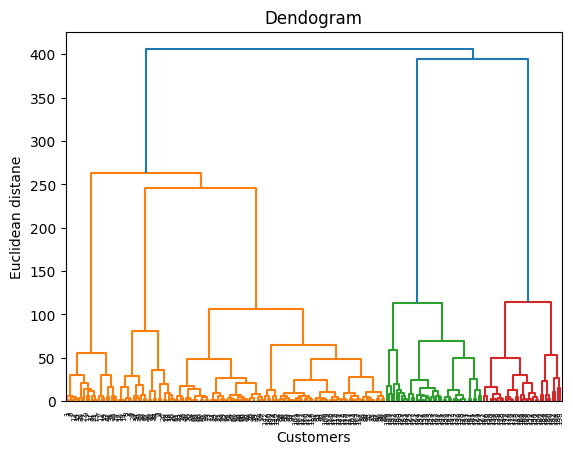

In [8]:
dendogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.xlabel('Customers')
plt.ylabel('Euclidean distane')
plt.title('Dendogram')

In [10]:
from sklearn.cluster import AgglomerativeClustering as ac

In [14]:
cluster_model = ac(n_clusters=5,affinity='euclidean',linkage='ward')

In [16]:
cluster_labels = cluster_model.fit_predict(X)
cluster_labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

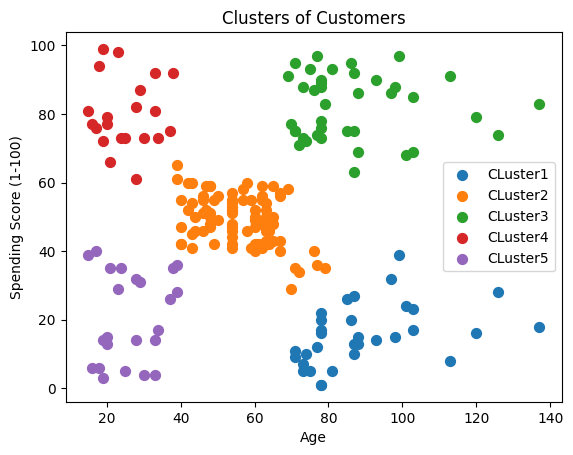

In [18]:
plt.scatter(X[cluster_labels==0,0],X[cluster_labels==0,1],s=50,label='CLuster1')
plt.scatter(X[cluster_labels==1,0],X[cluster_labels==1,1],s=50,label='CLuster2')
plt.scatter(X[cluster_labels==2,0],X[cluster_labels==2,1],s=50,label='CLuster3')
plt.scatter(X[cluster_labels==3,0],X[cluster_labels==3,1],s=50,label='CLuster4')
plt.scatter(X[cluster_labels==4,0],X[cluster_labels==4,1],s=50,label='CLuster5')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.legend(loc='right')

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
sil_avg_li = []
for i in range(2,11):
    cl = ac(n_clusters=i,linkage='ward',affinity='euclidean')
    y_c = cl.fit_predict(X)
    sil_avg = silhouette_score(X,y_c)
    sil_avg_li.append(sil_avg)

In [21]:
sil_avg_li

[0.36706444723912895,
 0.4618340266628975,
 0.4916598193892782,
 0.5529945955148897,
 0.5380208285578872,
 0.519904611908887,
 0.4326286245782246,
 0.43892545672004507,
 0.4342656377895271]